In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.dpi']= 120


from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_curve, auc
import xgboost as xgb

In [2]:
#/content/SUSY.csv.gz
#print(os.listdir('/content'))
if 'SUSY.csv' in os.listdir('/content'):
  print('file exists')
else:
  print('file downloading')
  !wget http://archive.ics.uci.edu/ml/machine-learning-databases/00279/SUSY.csv.gz
  !gzip -d SUSY.csv.gz
# Link to dataset: http://archive.ics.uci.edu/ml/datasets/SUSY
# 0: background
# 1: signal

file exists


In [3]:
df = pd.read_csv('SUSY.csv')
df.columns = ["label","lepton1-pT", "lepton1-eta", "lepton1-phi", "lepton2-pT", "lepton2-eta", "lepton2-phi", "missing-energy-magnitude", "missing-energy-phi", "MET-rel", "axial-MET", "MR", "MTR2", "R", "MT2", "SR", "MDeltaR", "dPhirb", "cos(thetar1)"]
df

,label,lepton1-pT,lepton1-eta,lepton1-phi,lepton2-pT,lepton2-eta,lepton2-phi,missing-energy-magnitude,missing-energy-phi,MET-rel,axial-MET,MR,MTR2,R,MT2,SR,MDeltaR,dPhirb,cos(thetar1)
0,1.0,1.667973,0.064191,-1.225171,0.506102,-0.338939,1.672543,3.475464,-1.219136,0.012955,3.775174,1.045977,0.568051,0.481928,0.000000,0.448410,0.205356,1.321893,0.377584
1,1.0,0.444840,-0.134298,-0.709972,0.451719,-1.613871,-0.768661,1.219918,0.504026,1.831248,-0.431385,0.526283,0.941514,1.587535,2.024308,0.603498,1.562374,1.135454,0.180910
2,1.0,0.381256,-0.976145,0.693152,0.448959,0.891753,-0.677328,2.033060,1.533041,3.046260,-1.005285,0.569386,1.015211,1.582217,1.551914,0.761215,1.715464,1.492257,0.090719
3,1.0,1.309996,-0.690089,-0.676259,1.589283,-0.693326,0.622907,1.087562,-0.381742,0.589204,1.365479,1.179295,0.968218,0.728563,0.000000,1.083158,0.043429,1.154854,0.094859
4,0.0,0.456398,1.099371,1.512453,0.751772,0.638967,-0.742216,0.322601,1.321054,0.169502,0.359941,0.489256,0.416168,0.754829,0.303750,0.461067,0.345541,0.733242,0.186044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4999994,1.0,0.853325,-0.961783,-1.487277,0.678190,0.493580,1.647969,1.843867,0.276954,1.025105,-1.486535,0.892879,1.684429,1.674084,3.366298,1.046707,2.646649,1.389226,0.364599
4999995,0.0,0.951581,0.139370,1.436884,0.880440,-0.351948,-0.740852,0.290863,-0.732360,0.001360,0.257738,0.802871,0.545319,0.602730,0.002998,0.748959,0.401166,0.443471,0.239953
4999996,0.0,0.840389,1.419162,-1.218766,1.195631,1.695645,0.663756,0.490888,-0.509186,0.704289,0.045744,0.825015,0.723530,0.778236,0.752942,0.838953,0.614048,1.210595,0.026692
4999997,1.0,1.784218,-0.833565,-0.560091,0.953342,-0.688969,-1.428233,2.660703,-0.861344,2.116892,2.906151,1.232334,0.952444,0.685846,0.000000,0.781874,0.676003,1.197807,0.093689


In [4]:
signal = df.loc[df['label']==1]
background = df.loc[df['label']==0]

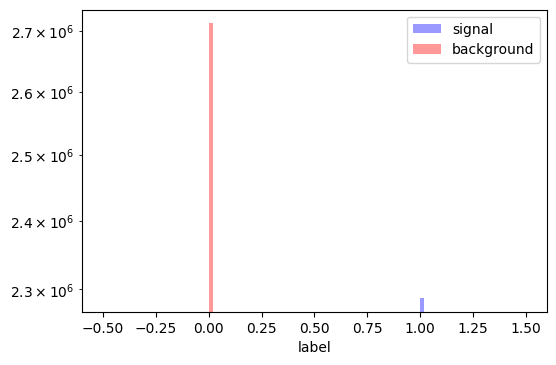

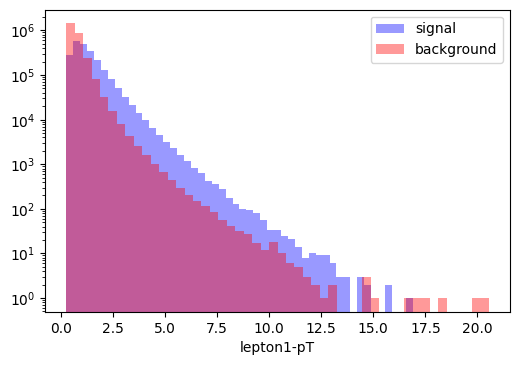

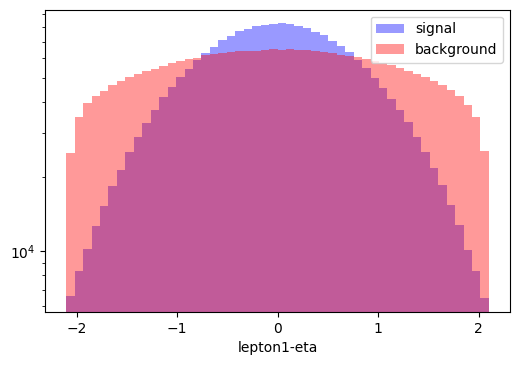

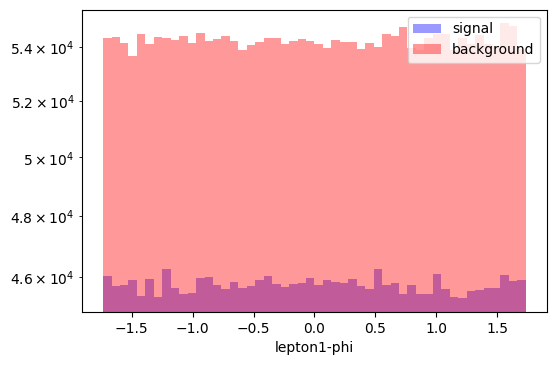

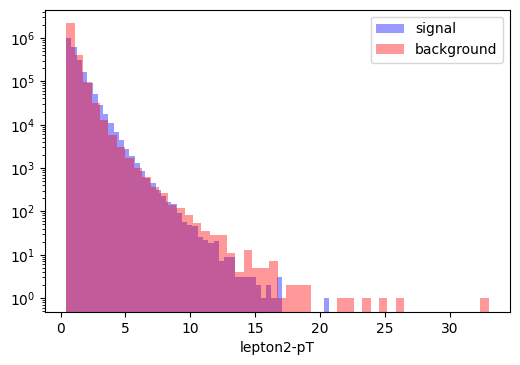

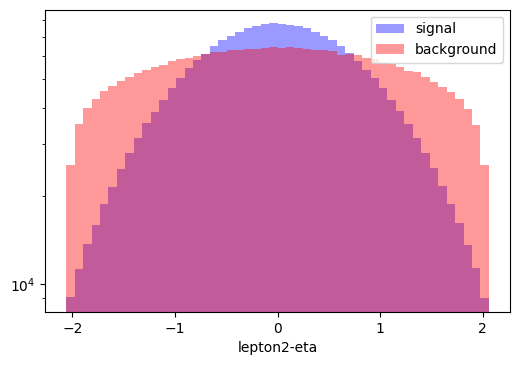

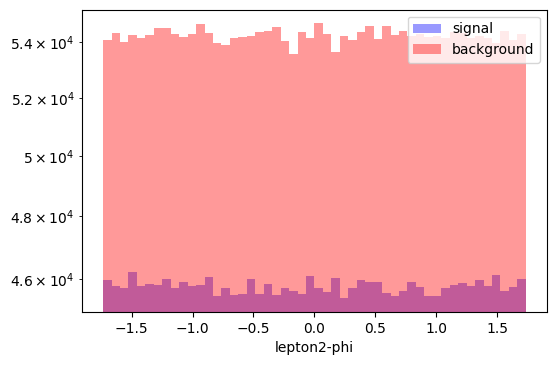

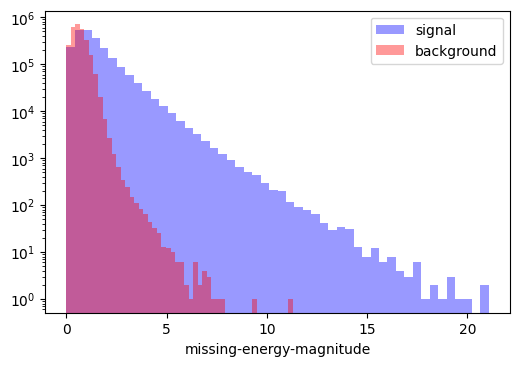

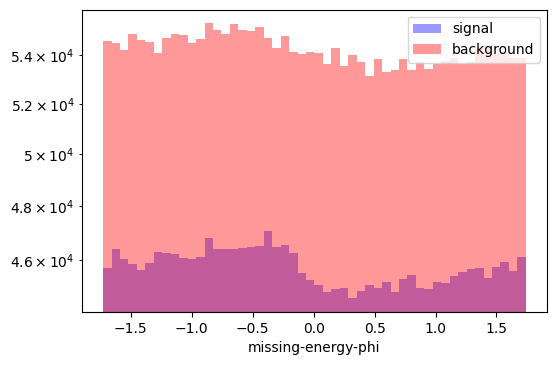

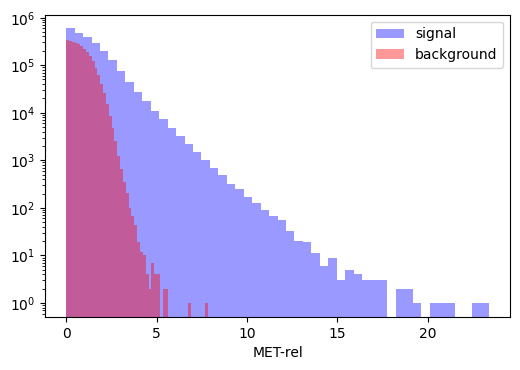

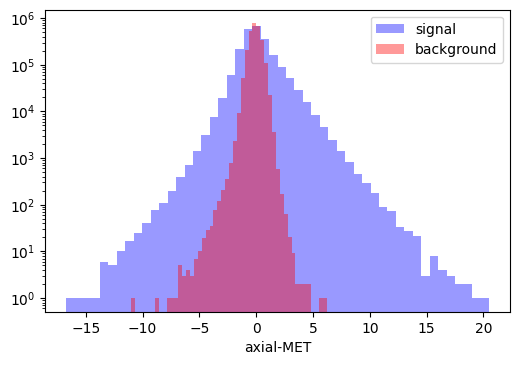

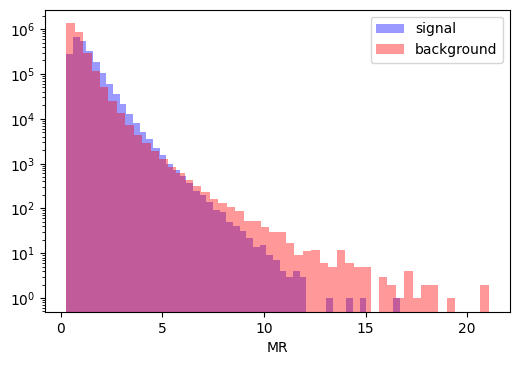

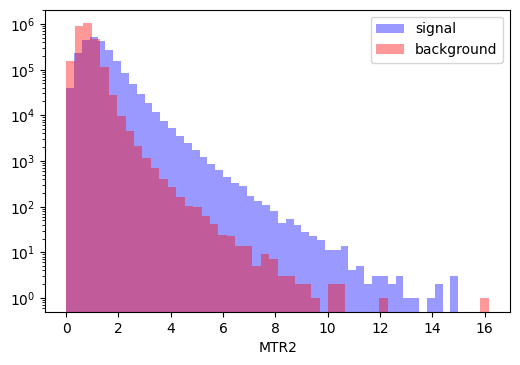

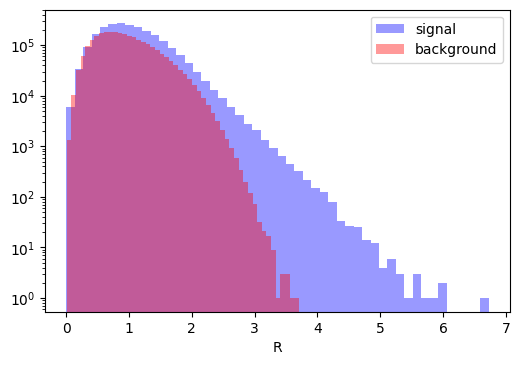

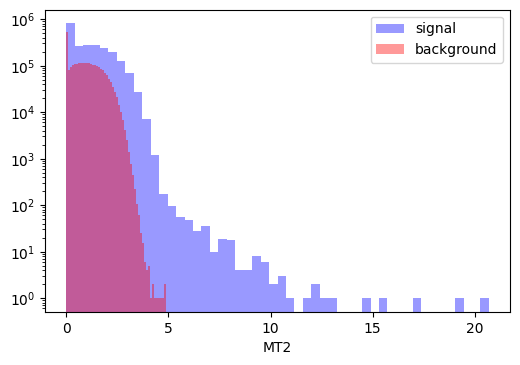

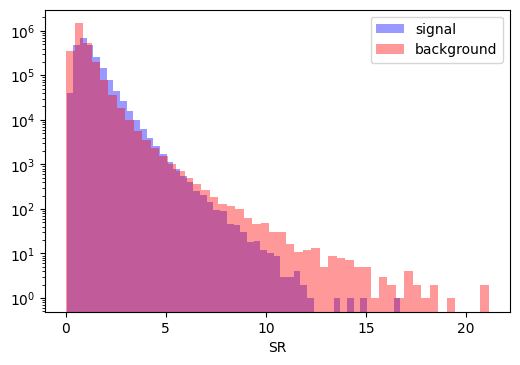

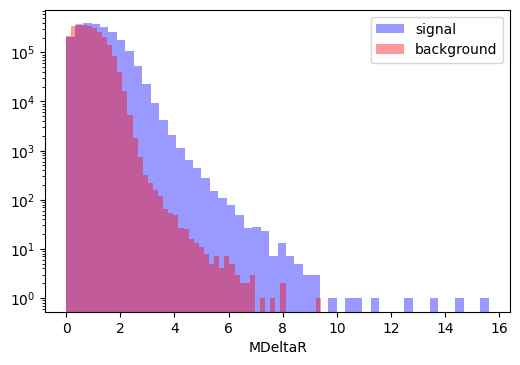

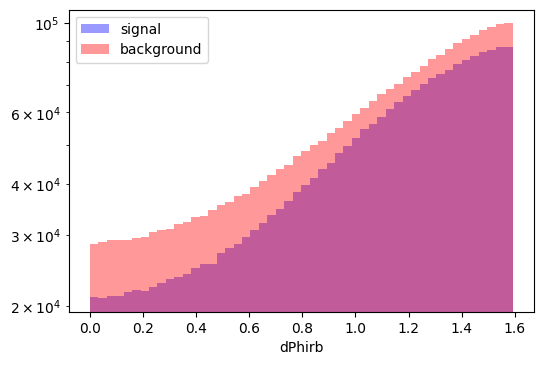

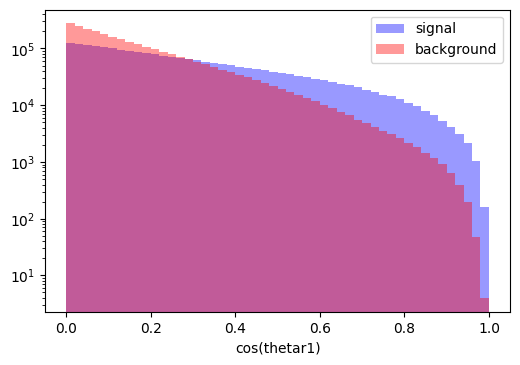

In [6]:
for col in df.columns:
  plt.hist(signal[col], alpha=0.4,bins=50,color='b',label='signal')#  range=[min,max]
  plt.hist(background[col],alpha=0.4,bins=50,color='r',label='background')#,range=[min,max]
  plt.xlabel(col)
  plt.yscale('log')
  plt.legend() 
  plt.show()

In [7]:
df_all =df
df_low_level=df[["label","lepton1-pT", "lepton1-eta", "lepton1-phi", "lepton2-pT", "lepton2-eta", "lepton2-phi", "missing-energy-magnitude", "missing-energy-phi"]]
df_high_level= df[["MET-rel", "axial-MET", "MR", "MTR2", "R", "MT2", "SR", "MDeltaR", "dPhirb", "cos(thetar1)"]]

In [8]:
#for df in df_all, df_low_level, df_high_level:
y = df_low_level[['label']]
X = df_low_level.drop('label',axis=1)
X=X.to_numpy()
y=y.to_numpy()
#y.ravel()

In [9]:
X_train, X_valid, y_train, y_valid =  train_test_split(X,y,random_state=1,test_size=.35)

In [15]:
#rand = RandomForestClassifier(criterion='gini',min_samples_leaf=5,max_depth=6,n_jobs=-1)reg_lambda=2,reg_alpha=0.1,
rand = xgb.XGBClassifier(max_depth=10,sampling_method='uniform',n_jobs=-1,random_state=1,tree_method='gpu_hist')#criterion='gini',min_samples_leaf=5,max_depth=6,n_jobs=-1)
rand.fit(X_train,y_train.ravel())
y_pred_xgb = rand.predict_proba(X_valid)

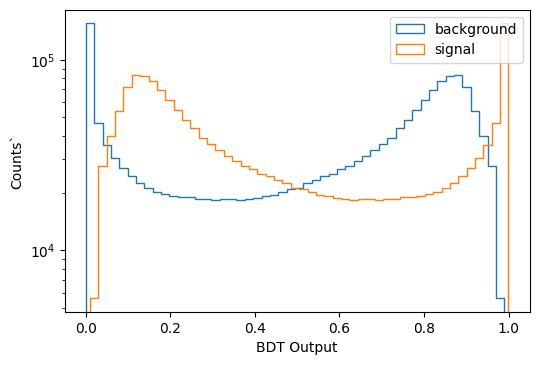

In [16]:
plt.hist(y_pred_xgb[:,0],label='background',bins=50,histtype='step')
plt.hist(y_pred_xgb[:,1],label='signal',bins=50,histtype='step')
plt.legend()
plt.xlabel('BDT Output')
plt.ylabel('Counts`')
plt.yscale('log')
#plt.gca().set_aspect('equal', adjustable='box')
plt.show()

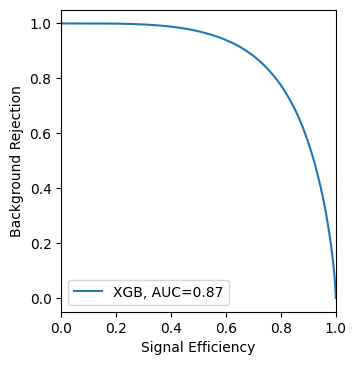

In [17]:
fpr_xgb, tpr_xgb, thresholds = roc_curve(y_valid.ravel(), y_pred_xgb[:,1].ravel())
auc_xgb = auc(fpr_xgb, tpr_xgb)
plt.plot(tpr_xgb, 1-fpr_xgb,label=f'XGB, AUC={auc_xgb:.2f}')
#plt.plot(tpr_xgb, 1/(fpr_xgb+.000001),label=f'RandomForestClassifier, AUC={auc_xgb:.2f}')
#plt.yscale('log')
plt.xlabel('Signal Efficiency')
plt.ylabel('Background Rejection')
plt.xlim([0.0, 1.0])
plt.gca().set_aspect('equal', adjustable='box')
plt.legend(loc='lower left',title_fontsize='x-small')
plt.show()

0.8028444 5.645478855454721


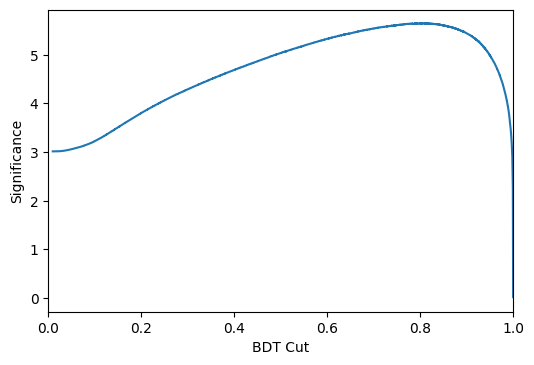

In [18]:
S = 100*tpr_xgb
B = 1000*fpr_xgb
metric = S/np.sqrt(S+B+.000000001)
opt_index = np.argmax(metric)
print(thresholds[opt_index],metric[opt_index])
plt.plot(thresholds,metric)
plt.xlim([0.0, 1.0])
plt.xlabel('BDT Cut')
plt.ylabel('Significance')
plt.show()

In [19]:
save = pd.DataFrame({"fpr_xgb" : fpr_xgb, "tpr_xgb" : tpr_xgb, "thresholds":thresholds})
save.to_csv("submission_xgb.csv", index=False)